# Assignment08
# Name : Junha Lee
# Student ID : 2017220159
# https://github.com/myosoo/Assignment08

# Import packages 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Load mnist dataset

In [2]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

# normalize the values of the input data to be [0, 1]

In [3]:
#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# example of distance function between two vectors x and y

In [4]:
#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

# make a matrix each column of which represents an images in a vector form

In [5]:
#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

# plot first 150 images out of 10,000 with their labels

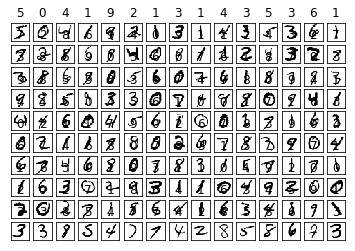

In [6]:
# 
# plot first 150 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(150):

    label       = list_label_train[i]
    im_vector   = list_image_train[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

# plot the average image of all the images for each digit

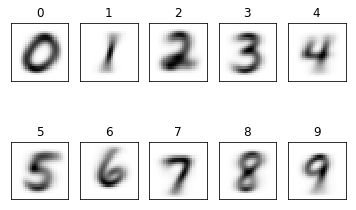

In [7]:
#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_train):

    im_average[:, list_label_train[i]] += list_image_train[:, i]
    im_count[list_label_train[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# Define a linear bi-partitioning function $\tilde{f}$ to classify digit ’0’ against all the other digits ’1’, ’2’, ’3’, ’4’, ’5’, ’6’, ’7’, ’8’, ’9 using the training data at MNIST dataset

In [8]:
def labeled_train():
    return np.empty(num_train, dtype = int)

f = labeled_train()

for i in range(num_train):
    if f[i] == 0: # 0 vs all
        f[i] = 1
    else:
        f[i] = -1

# Define and training theta : 
$\Theta = (\mathbf{A}^T\mathbf{A})^\mathbf{-1}\mathbf{A}^T\mathbf{y_2}$

In [9]:
A = np.transpose(list_image_train)
psuedo_inverse_A = np.linalg.pinv(A)    

def model_parameters(f, A):
    return np.linalg.pinv(A) * np.transpose(np.matrix(f)) # theta = pseudo inverse A * f

theta = model_parameters(f, A)


# Plot the value of the model parameters $\theta_1, \theta_2, \cdot\cdot\cdot \theta_{784}$ in the image form (28 × 28)

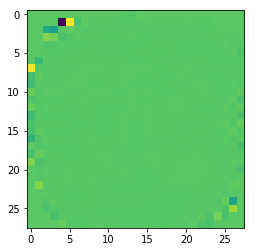

In [10]:
plt.imshow(theta.reshape(28, 28))
plt.show()

# Define classfier $\hat{f}(x) = sign(\tilde{f}(x))\$

In [11]:
def labeled_test():
    return np.empty(num_test, dtype = int)

F = labeled_test()

for i in range(num_test):
    if list_label_test[i] == 0:
        F[i] = 1
    else:
        F[i] = -1
        
B = list_image_test
y_hat = np.matmul(B.transpose(), theta)

for i in range(num_test): # sign function
    if y_hat[i] > 0:
        y_hat[i] = 1
    else:
        y_hat[i] = -1

# Present the evaluation value table (TP, FP, TN, FN)

In [12]:
for i in range(num_test):
    if y_hat[i] == 1:
        if y_hat[i] == labeled_test[i]:
            im_average[:, 0] += list_image_test[:, i]
            im_count[0] += 1
        else:
            im_average[:, 1] += list_image_test[:, i]
            im_count[1] += 1
    else:
        if y_hat[i] == F[i]:
            im_average[:, 2] += list_image_test[:, i]
            im_count[2] += 1
        else:
            im_average[:, 3] += list_image_test[:, i]
            im_count[3] += 1

# Plot the average image (28 × 28) of True Positive

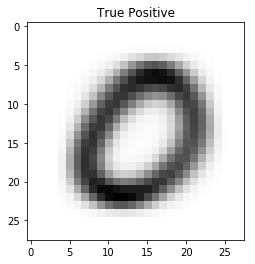

In [13]:
plt.imshow(im_average[:,0].reshape((size_row, size_col)), cmap='Greys')
plt.title('True Positive')
plt.show()

# Plot the average image (28 × 28) of True Negative

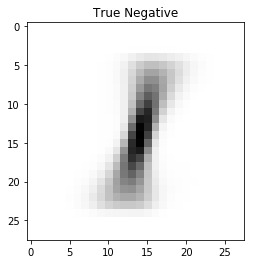

In [14]:
plt.imshow(im_average[:,1].reshape((size_row, size_col)), cmap='Greys')
plt.title('True Negative')
plt.show()

# Plot the average image (28 × 28) of False Positive

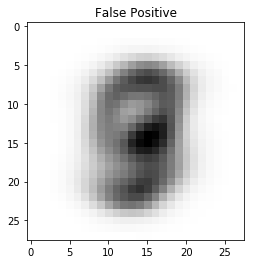

In [15]:
plt.imshow(im_average[:,2].reshape((size_row, size_col)), cmap='Greys')
plt.title('False Positive')
plt.show()

# Plot the average image (28 × 28) of False Negative

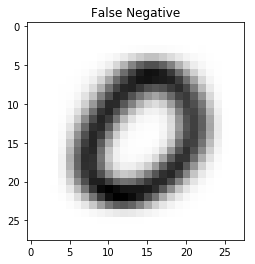

In [16]:
plt.imshow(im_average[:,3].reshape((size_row, size_col)), cmap='Greys')
plt.title('False Negative')
plt.show()